# Baltimore City Minority Report

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_theme()

In [2]:
%cd "C:\Users\localadmin\OneDrive - Towson University\Documents\data_science\capstone-project"


C:\Users\localadmin\OneDrive - Towson University\Documents\data_science\capstone-project


In [3]:
b = pd.read_csv("Part_1_Crime_data.csv")
c = pd.read_csv("CRIME_CODES.csv")

In [4]:
import datetime as dt

b['CrimeDateTime'] = pd.to_datetime(b['CrimeDateTime'])
b['Year'] = pd.to_datetime(b['CrimeDateTime']).dt.to_period('Y')


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [5]:
df = b.merge(c, how="left", left_on="CrimeCode", right_on="CODE")

In [6]:
df.query("VIO_PROP_CFS == 'VIOLENT'", inplace=True)

In [7]:
df['CrimeDateTime'] = pd.to_datetime(df['CrimeDateTime'])

In [8]:
df['week_num'] = df['CrimeDateTime'].dt.isocalendar().week
df['Year'] = df['CrimeDateTime'].dt.isocalendar().year

In [9]:
df_by_nh_gr = df.groupby('Neighborhood')
df_by_nh = df_by_nh_gr[['Total_Incidents']].count()

In [10]:
df_top20 = df_by_nh.sort_values(by='Total_Incidents', ascending=False)[:20]
df_top20_list = list(df_top20.index)

In [11]:
from scipy import fftpack


In [12]:
import datetime as dt
df20 = df[df['Neighborhood'].isin(df_top20_list)]

df20.loc[:, 'CrimeDateTime'] = df20['CrimeDateTime'].dt.floor('D')
df20.set_index("CrimeDateTime", inplace = True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [13]:
df20_by_nh_gr = df20.groupby('Neighborhood')

In [14]:
# dt is df10  DOWNTOWN neighborhood
# dt index is reset

# @Todo: ...

# dx is dt (DOWNTOWN) grouped-by CrimeDateTime, and counted

dt = df20[df20['Neighborhood'] == 'DOWNTOWN']

dt.reset_index(inplace=True)

df20.head()
dt.head()

dx = dt.groupby(["CrimeDateTime"])["X"].size().reset_index()


In [15]:
dx.set_index("CrimeDateTime", inplace=True)

In [16]:
from scipy import signal
f, pg = signal.periodogram(dx["X"])

In [17]:
f[1:21]

array([0.00028877, 0.00057753, 0.0008663 , 0.00115507, 0.00144383,
       0.0017326 , 0.00202137, 0.00231014, 0.0025989 , 0.00288767,
       0.00317644, 0.0034652 , 0.00375397, 0.00404274, 0.0043315 ,
       0.00462027, 0.00490904, 0.00519781, 0.00548657, 0.00577534])

In [18]:
pg[1:21]

array([66.26798908, 29.28836473, 60.51064015, 59.45208483, 12.02360145,
        8.12848556, 12.65005125, 33.42987692,  8.38732115,  3.68242021,
       98.72970618,  9.46677136, 16.94729433,  2.78767231,  7.21547482,
       10.19164899,  4.15035187,  5.85390514,  3.66718184, 10.01225422])

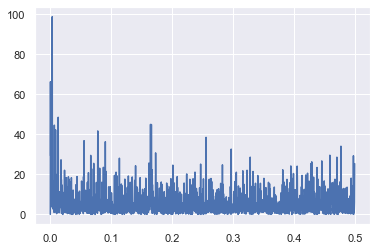

In [19]:
plt.plot(f, pg)

In [20]:
top20_periods = {}
top20_freq_indices = np.argsort(pg)[::-1][:20]
f20 = f[top20_freq_indices]
d20 = pg[top20_freq_indices]
p20 = 1/np.array(f20)
p20

array([3.14818182e+02, 3.46300000e+03, 1.15433333e+03, 8.65750000e+02,
       7.69555556e+01, 7.87045455e+01, 6.07543860e+00, 6.02260870e+00,
       1.50565217e+02, 1.15433333e+02, 1.28259259e+01, 3.90857788e+00,
       1.80364583e+01, 1.10638978e+01, 2.09497883e+00, 4.32875000e+02,
       3.36540330e+00, 5.78130217e+00, 2.17798742e+00, 1.50565217e+01])

In [21]:
# Daily/Weekly seasonality is visible from the above decomposition of periods
dx.head()

,X
CrimeDateTime,
1980-07-01 00:00:00+00:00,1
2010-10-23 00:00:00+00:00,1
2011-01-01 00:00:00+00:00,6
2011-01-02 00:00:00+00:00,2
2011-01-04 00:00:00+00:00,1


In [22]:
# dx.fillna(0)

In [23]:
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly

In [24]:
df_top20_list.sort()
df_top20_set = set(df_top20_list)

In [25]:
#import required packages
import os, json
import geopandas as gpd
from ipywidgets import widgets, HTML
from ipyleaflet import Map, GeoData, basemaps, LayersControl, ScaleControl, FullScreenControl, WidgetControl
from ipywidgets import widgets, IntSlider, jslink

In [26]:
# @MAP
from IPython.display import display, clear_output
import ipyleaflet
from ipyleaflet import basemaps, Map, Marker, GeoJSON
import ipywidgets

import geocoder

import ujson as json

In [27]:
balt = geocoder.osm('Baltimore City, Maryland')

In [28]:
latlng = balt.latlng

In [29]:
balt_map = Map(center=balt.latlng, zoom=11)

In [30]:
#nh = pd.read_csv('Neighborhoods.csv')

In [31]:
with open('Neighborhoods.geojson') as f:
    geo_json_balt = json.load(f)

In [32]:

def show_result_h(feature, **kwargs):
    clicked_nh = feature['properties']['name'].upper()
    if (clicked_nh in df_top20_set):
        nh_dropdown.value = clicked_nh

geo_json_balt_layer = GeoJSON(data=geo_json_balt,

    hover_style={
        'color': 'white', 'dashArray': '0'
    })

def change_style_color(feature):
    if (feature['properties']['name'].upper() in df_top20_set):
        return  {'fillColor': 'blue'} 
    
    else:
        return {'fillColor': 'gray'}
    
geo_json_balt_layer.style_callback = change_style_color


geo_json_balt_layer.on_click(show_result_h)


def on_hover_h(feature, **kwargs):
    hovered_nh = feature['properties']['name'].upper()
    if (hovered_nh in df_top20_set):
        nh_dropdown.value = hovered_nh
        
    with out:
        out.clear_output(wait=True)
        print(hovered_nh, flush=True)

geo_json_balt_layer.on_hover(on_hover_h)


In [33]:
# add geo_json layer to map
if geo_json_balt_layer not in balt_map.layers:
    balt_map.add(geo_json_balt_layer)
    


In [34]:
out = widgets.Output(layout={'border': '1px solid black'})


In [35]:
def min_report(r):
    nh_df = df20[df20['Neighborhood'] == r]
    nh_df.reset_index(inplace=True)
    nh_ct_df = nh_df.groupby(["CrimeDateTime"])["X"].size().reset_index()

    train_df = pd.DataFrame()
    train_df['ds'] =  nh_ct_df['CrimeDateTime'].dt.tz_localize(None)
    train_df['y'] =  nh_ct_df['X']


    fbo = Prophet(daily_seasonality=True)
    fbo.fit(train_df)
    future = fbo.make_future_dataframe(periods=7)
    rep = fbo.predict(future)

    return rep, fbo


In [36]:
nh_dropdown = widgets.Dropdown(
    options=df_top20_list,
    value=df_top20_list[7],
    description='Area',
    disabled=False,
)


In [37]:
report_button = widgets.Button(
    description=' Show Report',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Run report',
    icon='line-chart' # (FontAwesome names without the `fa-` prefix)
)

def on_button_clicked(b):
    rep, fbo = min_report(nh_dropdown.value)
    rep['Crime Incidents'] = rep['yhat'].round().astype('int32')
    with out:
        out.clear_output(wait=False)
        print(nh_dropdown.value,  flush=True)
        print(rep.loc[rep['ds'] > '2022-05-18', ['ds', 'Crime Incidents']],  flush=True)

        print(fbo.plot_components(rep), flush=True)
        

report_button.on_click(on_button_clicked, False)

Map(center=[39.2908816, -76.610759], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

Output(layout=Layout(border='1px solid black'))

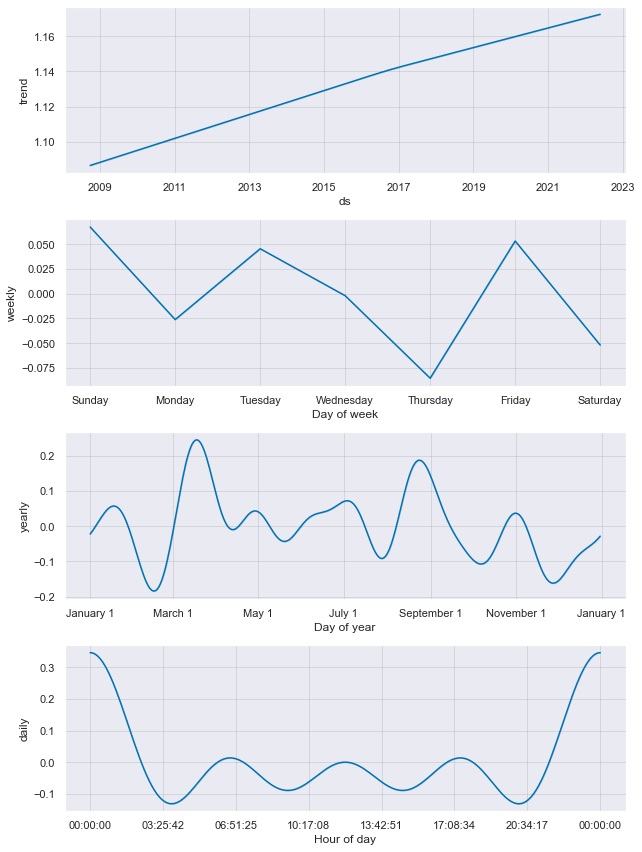

In [38]:
box = widgets.VBox([nh_dropdown, report_button])
display(balt_map)
display(box)
display(out)

In [39]:
# display(out)